<a href="https://colab.research.BVHle.com/github/amanjain252002/Stock-Price-Prediction/blob/main/Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.BVHle.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install tensorflow pandas matplotlib 
 

/Users/macbook/.zshenv:1: command not found: c


In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
ACB = pd.read_csv("./Database/Pre_Processed_ACB.csv")
BIDV = pd.read_csv("./Database/Pre_Processed_BIDV.csv")
BVH = pd.read_csv("./Database/Pre_Processed_BVH.csv")
CTG = pd.read_csv("./Database/Pre_Processed_CTG.csv")
FPT = pd.read_csv("./Database/Pre_Processed_FPT.csv")

### Data Proprocessing

In [6]:
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model

In [7]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [8]:
model = Model()

2024-09-29 10:54:09.356421: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-09-29 10:54:09.357719: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-09-29 10:54:09.357768: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-09-29 10:54:09.358646: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-29 10:54:09.358770: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:

model.summary()
model.save('model.h5')



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 200)         │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 548,005 (2.09 MB)

 Trainable params: 548,005 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

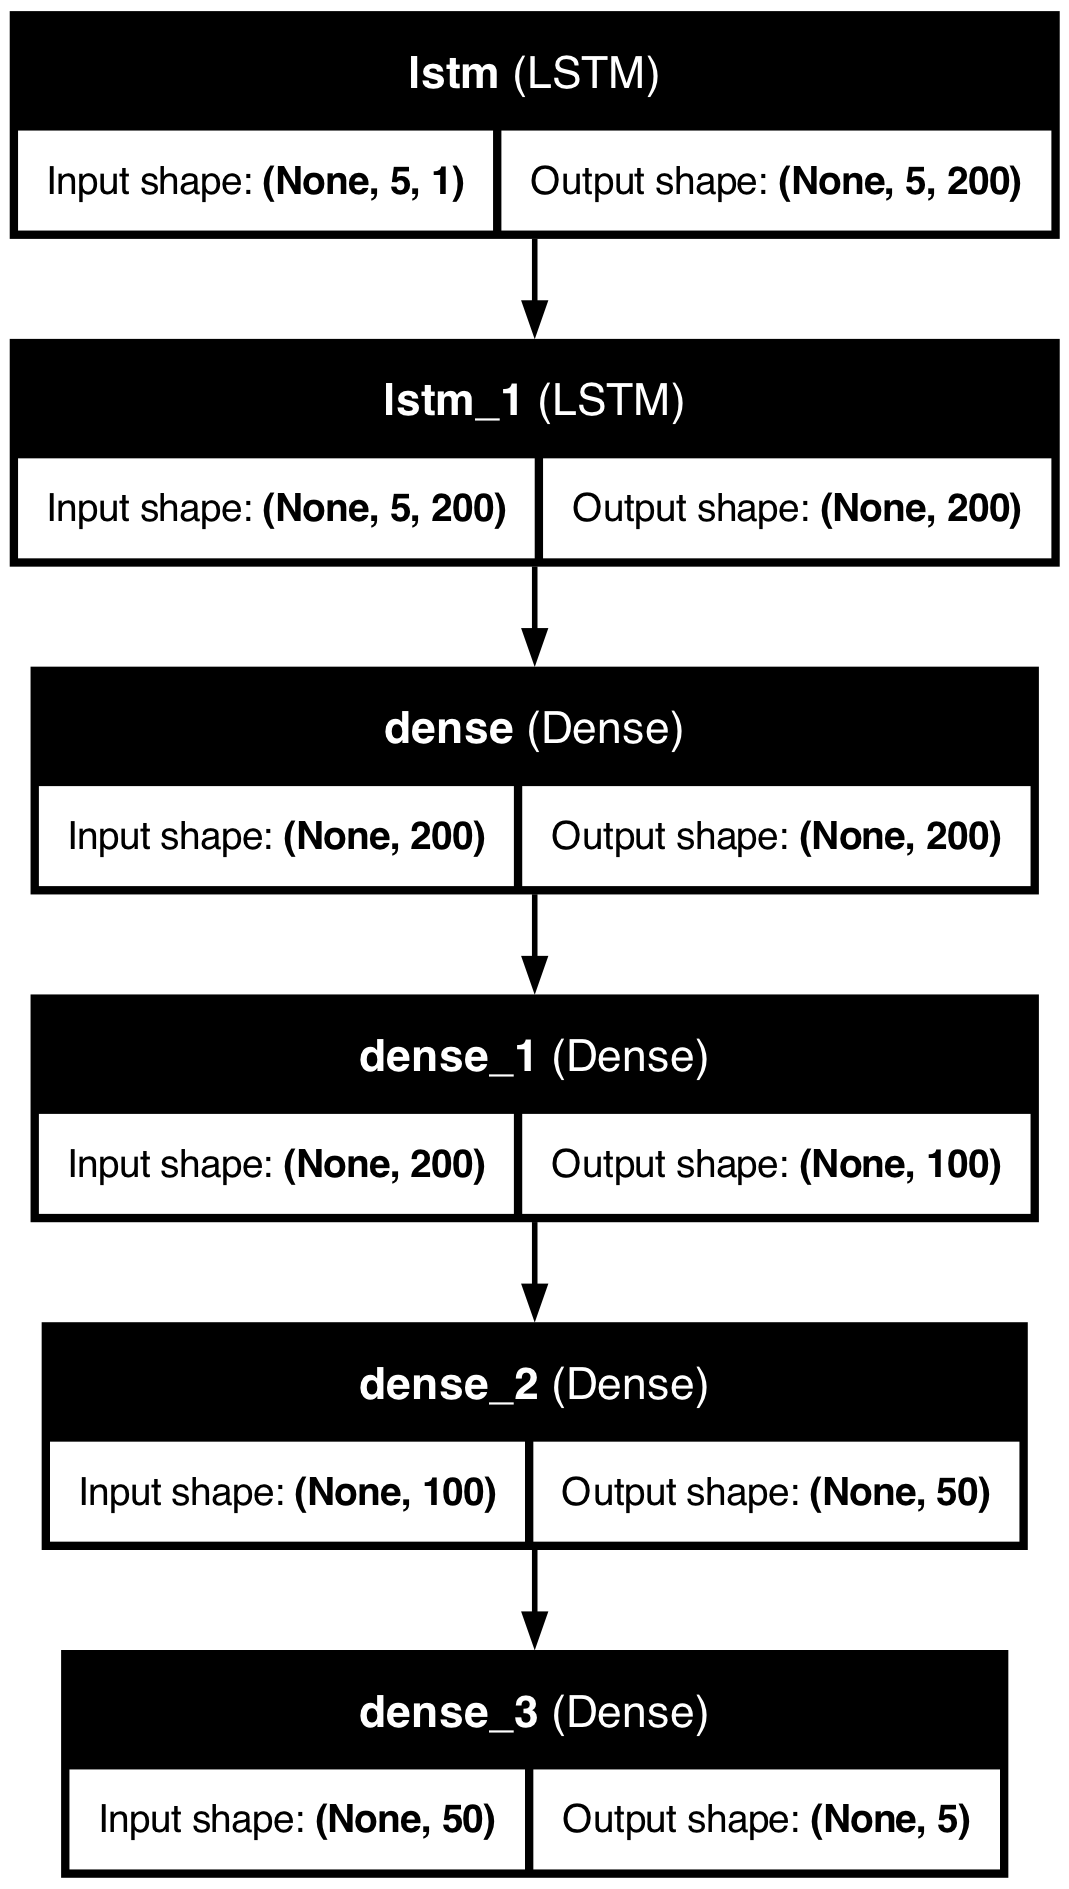

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=True )

### Custom Learning Rate

In [10]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

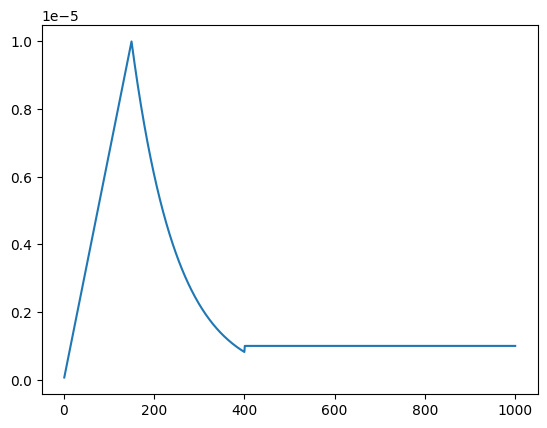

In [11]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [12]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#Apple

In [13]:
ACB.head()

,Date,Open,High,Low,Adj. Close,Volume
0,2019-01-02 00:00:00,11.703,11.693,11.416,11.544,1103106.0
1,2019-01-03 00:00:00,10.398,11.360,10.267,11.110,1956382.0
2,2019-01-04 00:00:00,11.070,11.413,11.052,11.189,2771983.0
3,2019-01-07 00:00:00,11.426,11.402,11.244,11.347,1305819.0
4,2019-01-08 00:00:00,12.414,12.378,11.235,11.268,846226.0


In [14]:
ACB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1427 non-null   object 
 1   Open        1427 non-null   float64
 2   High        1427 non-null   float64
 3   Low         1427 non-null   float64
 4   Adj. Close  1427 non-null   float64
 5   Volume      1427 non-null   float64
dtypes: float64(5), object(1)
memory usage: 67.0+ KB


In [15]:
# Change Dtype of Date column
#["Date"] = pd.to_datetime(ACB["Date"])

### Split the Data into Training and Test set


In [16]:
ACB_Date = '2023-07-21'
ACB_Train_X, ACB_Train_Y, ACB_Test_X, ACB_Test_Y = Dataset(ACB, ACB_Date)

### Model Fitting

In [17]:
ACB_Model = Model()

In [18]:
ACB_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [19]:
ACB_hist = ACB_Model.fit(ACB_Train_X, ACB_Train_Y, epochs = 1000, validation_data = (ACB_Test_X, ACB_Test_Y), callbacks=[callback])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 301.1125 - root_mean_squared_error: 17.3498 - val_loss: 605.9325 - val_root_mean_squared_error: 24.6157 - learning_rate: 0.0000e+00
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 292.6972 - root_mean_squared_error: 17.1072 - val_loss: 605.9254 - val_root_mean_squared_error: 24.6156 - learning_rate: 6.6667e-08
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 293.0979 - root_mean_squared_error: 17.1195 - val_loss: 605.9111 - val_root_mean_squared_error: 24.6153 - learning_rate: 1.3333e-07
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 290.6158 - root_mean_squared_error: 17.0468 - val_loss: 605.8901 - val_root_mean_squared_error: 24.6148 - learning_rate: 2.0000e-07
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 302.1734 - root_mean_squared_error: 17.3812 - val_loss: 605.8622 - val_root_mean_squared_error: 24.6143 - learning_rate: 2.6667e-07
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms

In [20]:
history_dict = ACB_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

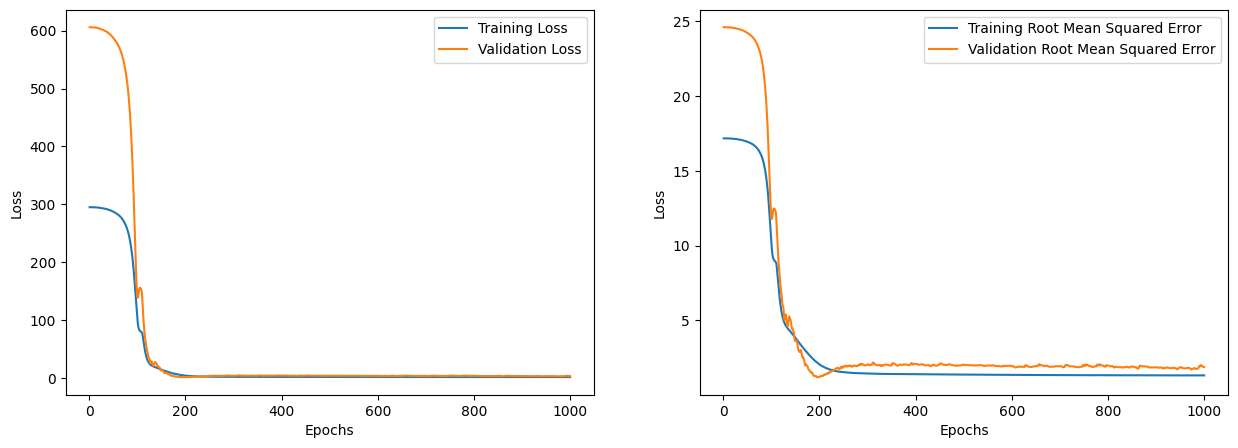

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of ACB

In [22]:
ACB_prediction = ACB_Model.predict(ACB_Test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step


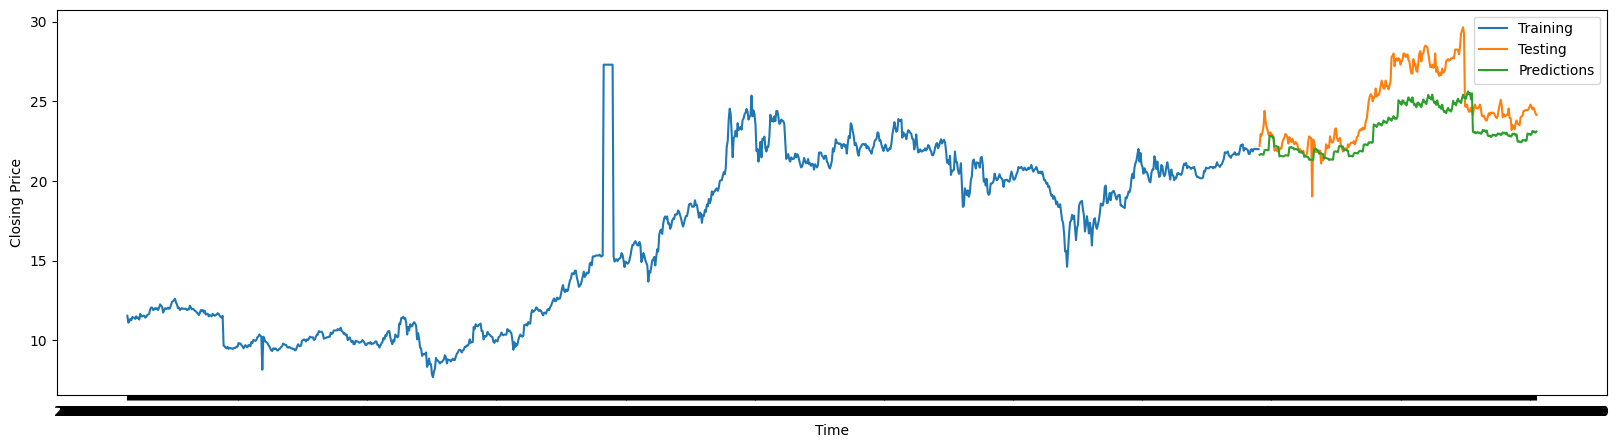

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the start date of testing period
test_start_date = '2023-07-21'

# Ensure that ACB_Test_Y and ACB_prediction are 1-dimensional
ACB_Test_Y = np.ravel(ACB_Test_Y)  # Flatten if necessary
ACB_prediction = np.ravel(ACB_prediction)  # Flatten if necessary

# Create a DataFrame for testing data
# Ensure dates for the testing period align with the length of ACB_Test_Y
ACB_Test_Data = pd.DataFrame({
    'Date': ACB['Date'][ACB['Date'] >= test_start_date].reset_index(drop=True)[:len(ACB_Test_Y)],
    'Adj. Close': ACB_Test_Y
})

# Add predictions to the DataFrame
ACB_Test_Data['Predictions'] = ACB_prediction

# Plotting
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(ACB['Date'][ACB['Date'] < test_start_date], ACB['Adj. Close'][ACB['Date'] < test_start_date], label='Training')

# Plot Testing Data
plt.plot(ACB_Test_Data['Date'], ACB_Test_Data['Adj. Close'], label='Testing')

# Plot Predictions
plt.plot(ACB_Test_Data['Date'], ACB_Test_Data['Predictions'], label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()


In [24]:

# Ensure that ACB_Test_Y and ACB_prediction are 1-dimensional and have the same length
ACB_Test_Y = np.ravel(ACB_Test_Y)
ACB_prediction = np.ravel(ACB_prediction)
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(ACB_Test_Y, ACB_prediction))
print(f'RMSE: {rmse}')

# Calculate MAPE
mape = np.mean(np.abs((ACB_Test_Y - ACB_prediction) / ACB_Test_Y)) * 100
print(f'MAPE: {mape}%')

# Calculate MAE
mae = mean_absolute_error(ACB_Test_Y, ACB_prediction)
print(f'MAE: {mae}')

# Calculate SEM (Standard Error of the Mean)
sem = np.std(ACB_Test_Y - ACB_prediction) / np.sqrt(len(ACB_Test_Y))
print(f'SEM: {sem}')


RMSE: 1.8734876163388088
MAPE: 6.030610547026909%
MAE: 1.5509391066959926
SEM: 0.06986491822950047


# BIDV

In [25]:
BIDV.head()

,Date,Open,High,Low,Adj. Close,Volume
0,2019-01-02,22.968,22.968,22.334,22.367,805700.0
1,2019-01-03,22.367,22.568,21.366,21.366,1107500.0
2,2019-01-04,21.032,21.333,20.565,21.065,1457300.0
3,2019-01-07,21.366,22.034,21.366,21.566,806060.0
4,2019-01-08,21.767,21.767,21.299,21.366,558540.0


In [26]:
BIDV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1422 non-null   object 
 1   Open        1422 non-null   float64
 2   High        1422 non-null   float64
 3   Low         1422 non-null   float64
 4   Adj. Close  1422 non-null   float64
 5   Volume      1422 non-null   float64
dtypes: float64(5), object(1)
memory usage: 66.8+ KB


In [27]:
# Change Dtype of Date column
BIDV["Date"] = pd.to_datetime(BIDV["Date"])

### Split the Data into Training and Test set
    

In [28]:
BIDV_Date = '2023-07-21'
BIDV_Train_X, BIDV_Train_Y, BIDV_Test_X, BIDV_Test_Y = Dataset(BIDV, BIDV_Date)

### Model Fitting

In [29]:
BIDV_Model = Model()

In [30]:
BIDV_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])


In [31]:
BIDV_hist = BIDV_Model.fit(BIDV_Train_X, BIDV_Train_Y, epochs = 200, validation_data = (BIDV_Test_X, BIDV_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 956.4944 - root_mean_squared_error: 30.9271 - val_loss: 2069.5564 - val_root_mean_squared_error: 45.4924 - learning_rate: 0.0000e+00
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 958.4449 - root_mean_squared_error: 30.9585 - val_loss: 2069.5344 - val_root_mean_squared_error: 45.4921 - learning_rate: 6.6667e-08
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 947.8132 - root_mean_squared_error: 30.7855 - val_loss: 2069.4900 - val_root_mean_squared_error: 45.4916 - learning_rate: 1.3333e-07
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 963.9998 - root_mean_squared_error: 31.0477 - val_loss: 2069.4214 - val_root_mean_squared_error: 45.4909 - learning_rate: 2.0000e-07
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 944.9254 - root_mean_squared_error: 30.7390 - val_loss: 2069.3315 - val_root_mean_squared_error: 45.4899 - learning_rate: 2.6667e-07
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/

In [32]:
history_dict = BIDV_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

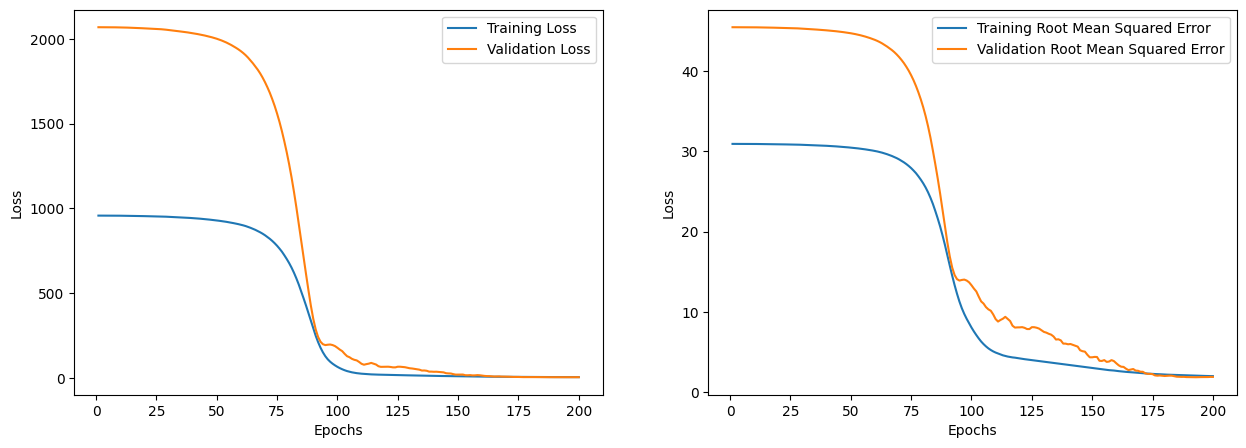

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()
plt.show()

### Predicting the closing stock price of BIDV

In [34]:
BIDV_prediction = BIDV_Model.predict(BIDV_Test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


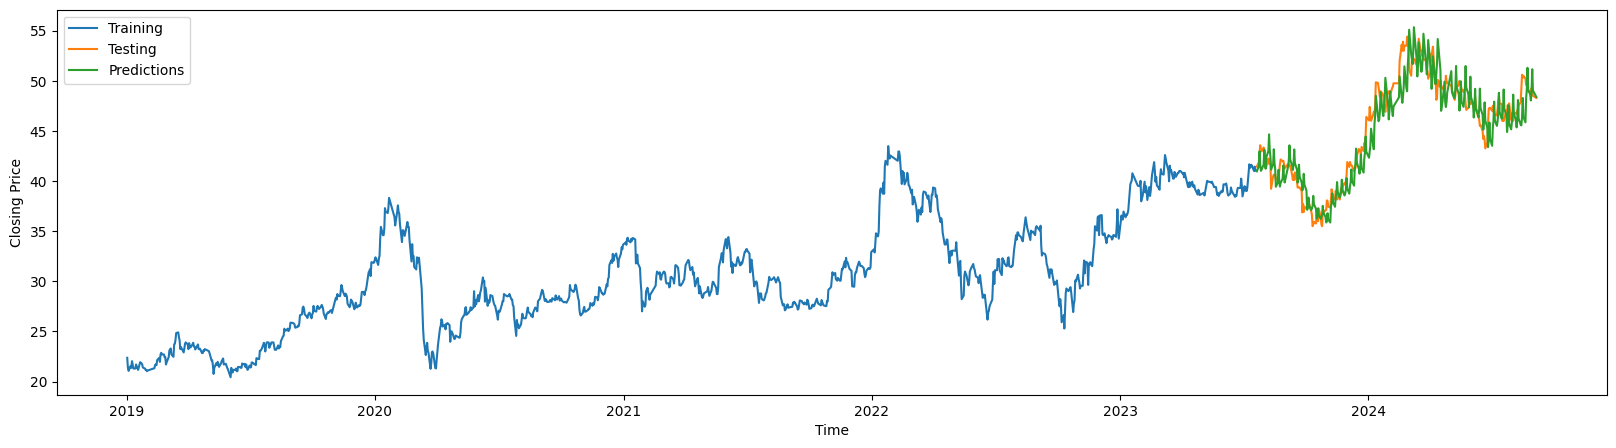

In [35]:

# Define the start date of testing period
test_start_date = '2023-07-21'

# Ensure that ACB_Test_Y and ACB_prediction are 1-dimensional
BIDV_Test_Y = np.ravel(BIDV_Test_Y)  # Flatten if necessary
BIDV_prediction = np.ravel(BIDV_prediction)  # Flatten if necessary

# Create a DataFrame for testing data
BIDV_Test_Data = pd.DataFrame({
    'Date': BIDV['Date'][BIDV['Date'] >= test_start_date].reset_index(drop=True)[:len(BIDV_Test_Y)],
    'Adj. Close': BIDV_Test_Y
})

# Add predictions to the DataFrame
BIDV_Test_Data['Predictions'] = BIDV_prediction

# Plotting
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(BIDV['Date'][BIDV['Date'] < test_start_date], BIDV['Adj. Close'][BIDV['Date'] < test_start_date], label='Training')

# Plot Testing Data
plt.plot(BIDV_Test_Data['Date'],BIDV_Test_Data['Adj. Close'], label='Testing')

# Plot Predictions
plt.plot(BIDV_Test_Data['Date'], BIDV_Test_Data['Predictions'], label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()


In [36]:
BIDV_Test_Y = np.ravel(BIDV_Test_Y)
BIDV_prediction = np.ravel(BIDV_prediction)
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(BIDV_Test_Y, BIDV_prediction))
print(f'RMSE: {rmse}')

# Calculate MAPE
mape = np.mean(np.abs((BIDV_Test_Y - BIDV_prediction) / BIDV_Test_Y)) * 100
print(f'MAPE: {mape}%')

# Calculate MAE
mae = mean_absolute_error(BIDV_Test_Y, BIDV_prediction)
print(f'MAE: {mae}')

# Calculate SEM (Standard Error of the Mean)
sem = np.std(BIDV_Test_Y - BIDV_prediction) / np.sqrt(len(BIDV_Test_Y))
print(f'SEM: {sem}')


RMSE: 1.881937296079197
MAPE: 3.229640502493409%
MAE: 1.480472555215018
SEM: 0.11019670860978863


# BVH

In [37]:
BVH.head()

,Date,Open,High,Low,Adj. Close,Volume
0,2019-01-02,79.787,79.787,78.119,78.119,87080.0
1,2019-01-03,79.436,79.875,77.593,78.295,55310.0
2,2019-01-04,78.295,78.295,75.486,77.768,96940.0
3,2019-01-07,78.558,79.699,76.978,77.768,92970.0
4,2019-01-08,77.768,77.768,77.241,77.417,36610.0


In [38]:
BVH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1422 non-null   object 
 1   Open        1422 non-null   float64
 2   High        1422 non-null   float64
 3   Low         1422 non-null   float64
 4   Adj. Close  1422 non-null   float64
 5   Volume      1422 non-null   float64
dtypes: float64(5), object(1)
memory usage: 66.8+ KB


In [39]:
# Change Dtype of Date column
BVH["Date"] = pd.to_datetime(BVH["Date"])

### Split the Data into Training and Test set


In [40]:
BVH_Date = '2023-07-21'
BVH_Train_X, BVH_Train_Y, BVH_Test_X, BVH_Test_Y = Dataset(BVH, BVH_Date)

### Model Fitting

In [41]:
BVH_Model = Model()

In [42]:
BVH_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [43]:
BVH_hist = BVH_Model.fit(BVH_Train_X, BVH_Train_Y, epochs = 1000, validation_data = (BVH_Test_X, BVH_Test_Y), callbacks = [callback])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3046.1382 - root_mean_squared_error: 55.1762 - val_loss: 1799.8574 - val_root_mean_squared_error: 42.4247 - learning_rate: 0.0000e+00
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2994.7678 - root_mean_squared_error: 54.7229 - val_loss: 1799.8210 - val_root_mean_squared_error: 42.4243 - learning_rate: 6.6667e-08
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2997.3889 - root_mean_squared_error: 54.7458 - val_loss: 1799.7483 - val_root_mean_squared_error: 42.4234 - learning_rate: 1.3333e-07
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2926.5952 - root_mean_squared_error: 54.0835 - val_loss: 1799.6398 - val_root_mean_squared_error: 42.4222 - learning_rate: 2.0000e-07
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2953.4407 - root_mean_squared_error: 54.3436 - val_loss: 1799.4944 - val_root_mean_squared_error: 42.4204 - learning_rate: 2.6667e-07
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━

In [44]:
history_dict = BVH_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

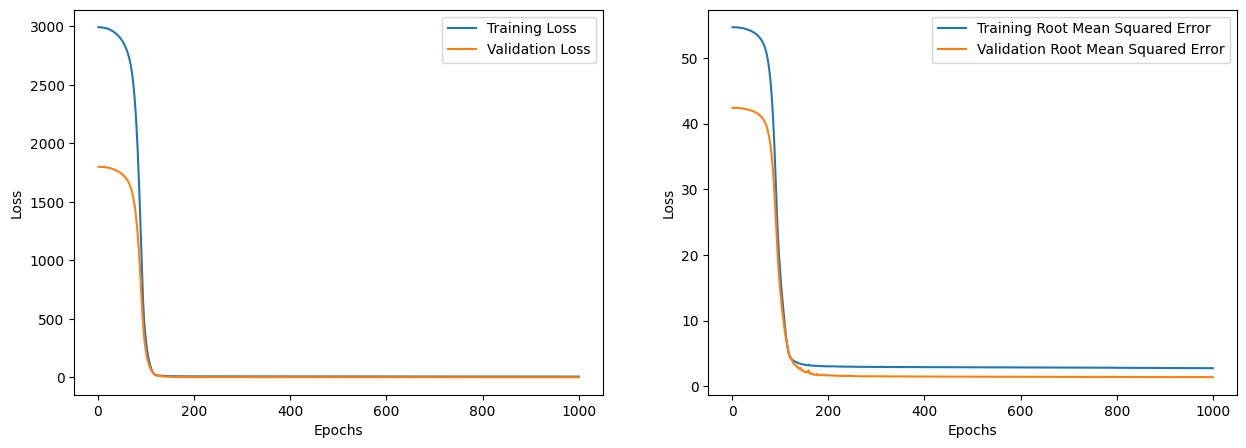

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of BVHle

In [46]:
BVH_prediction = BVH_Model.predict(BVH_Test_X)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x311b65310> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


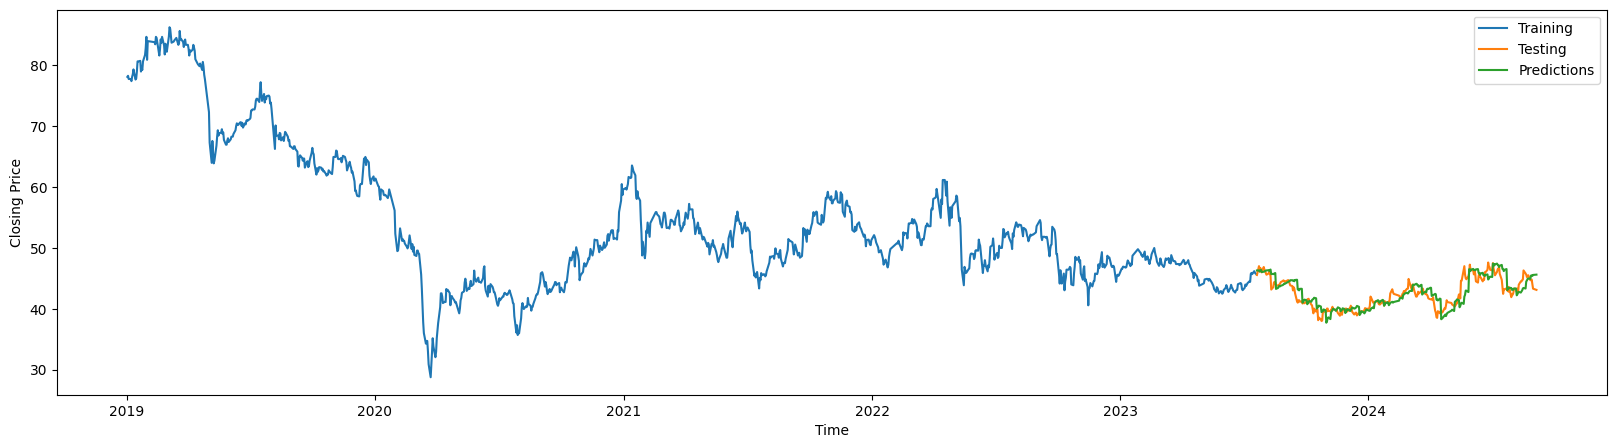

In [47]:

# Define the start date of testing period
test_start_date = '2023-07-21'

# Ensure that ACB_Test_Y and ACB_prediction are 1-dimensional
BVH_Test_Y = np.ravel(BVH_Test_Y)  # Flatten if necessary
BVH_prediction = np.ravel(BVH_prediction)  # Flatten if necessary

# Create a DataFrame for testing data
BVH_Test_Data = pd.DataFrame({
    'Date': BVH['Date'][BVH['Date'] >= test_start_date].reset_index(drop=True)[:len(BVH_Test_Y)],
    'Adj. Close': BVH_Test_Y
})

# Add predictions to the DataFrame
BVH_Test_Data['Predictions'] = BVH_prediction

# Plotting
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(BVH['Date'][BVH['Date'] < test_start_date], BVH['Adj. Close'][BVH['Date'] < test_start_date], label='Training')

# Plot Testing Data
plt.plot(BVH_Test_Data['Date'],BVH_Test_Data['Adj. Close'], label='Testing')

# Plot Predictions
plt.plot(BVH_Test_Data['Date'], BVH_Test_Data['Predictions'], label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()


In [48]:
BVH_Test_Y = np.ravel(BVH_Test_Y)
BVH_prediction = np.ravel(BVH_prediction)
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(BVH_Test_Y, BVH_prediction))
print(f'RMSE: {rmse}')

# Calculate MAPE
mape = np.mean(np.abs((BVH_Test_Y - BVH_prediction) / BVH_Test_Y)) * 100
print(f'MAPE: {mape}%')

# Calculate MAE
mae = mean_absolute_error(BVH_Test_Y, BVH_prediction)
print(f'MAE: {mae}')

# Calculate SEM (Standard Error of the Mean)
sem = np.std(BVH_Test_Y - BVH_prediction) / np.sqrt(len(BVH_Test_Y))
print(f'SEM: {sem}')


RMSE: 1.380037166101656
MAPE: 2.4176749848991803%
MAE: 1.0277198184422085
SEM: 0.08214333284855468


# CTG

In [49]:
CTG.head()

,Date,Open,High,Low,Adj. Close,Volume
0,2019-01-02,12.844,12.978,12.677,12.677,2420340.0
1,2019-01-03,12.677,12.811,12.043,12.077,5513360.0
2,2019-01-04,12.043,12.377,11.810,12.244,3804290.0
3,2019-01-07,12.544,12.544,12.110,12.110,3982660.0
4,2019-01-08,12.177,12.177,11.877,11.943,5636280.0


In [50]:
CTG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1422 non-null   object 
 1   Open        1422 non-null   float64
 2   High        1422 non-null   float64
 3   Low         1422 non-null   float64
 4   Adj. Close  1422 non-null   float64
 5   Volume      1422 non-null   float64
dtypes: float64(5), object(1)
memory usage: 66.8+ KB


In [51]:
# Change Dtype of Date column
CTG["Date"] = pd.to_datetime(CTG["Date"])

### Split the Data into Training and Test set


In [52]:
CTG_Date = '2023-07-21'
CTG_Train_X, CTG_Train_Y, CTG_Test_X, CTG_Test_Y = Dataset(CTG, CTG_Date)

### Model Fitting

In [53]:
CTG_Model = Model()

In [54]:
CTG_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [55]:
CTG_hist = CTG_Model.fit(CTG_Train_X, CTG_Train_Y, epochs = 1000, validation_data = (CTG_Test_X, CTG_Test_Y), callbacks=[callback])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 516.1876 - root_mean_squared_error: 22.7195 - val_loss: 951.4691 - val_root_mean_squared_error: 30.8459 - learning_rate: 0.0000e+00
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 517.0286 - root_mean_squared_error: 22.7355 - val_loss: 951.4541 - val_root_mean_squared_error: 30.8456 - learning_rate: 6.6667e-08
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 502.1990 - root_mean_squared_error: 22.4023 - val_loss: 951.4254 - val_root_mean_squared_error: 30.8452 - learning_rate: 1.3333e-07
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 505.4026 - root_mean_squared_error: 22.4786 - val_loss: 951.3799 - val_root_mean_squared_error: 30.8444 - learning_rate: 2.0000e-07
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 509.2560 - root_mean_squared_error: 22.5664 - val_loss: 951.3206 - val_root_mean_squared_error: 30.8435 - learning_rate: 2.6667e-07
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms

In [56]:
history_dict = BVH_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

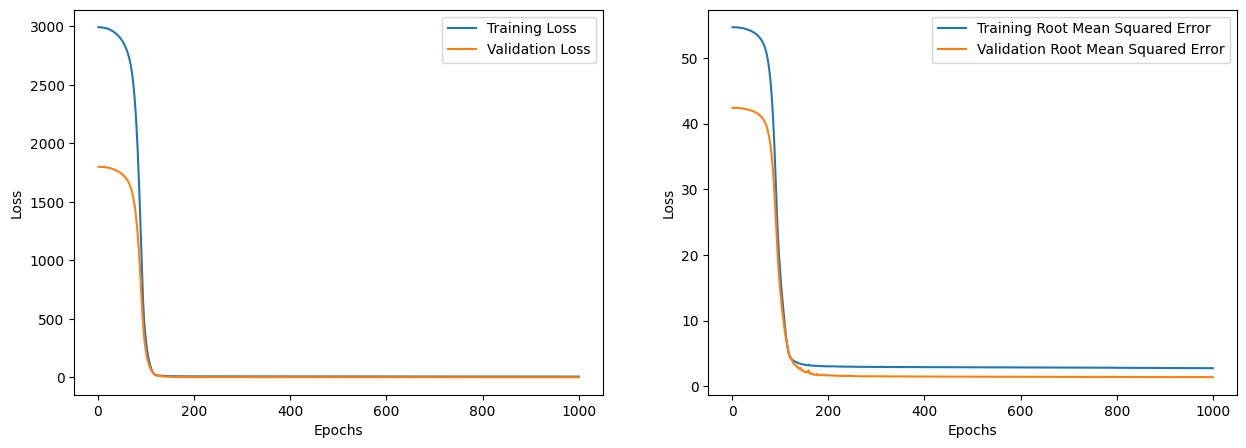

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Microsoft

In [58]:
CTG_prediction = CTG_Model.predict(CTG_Test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


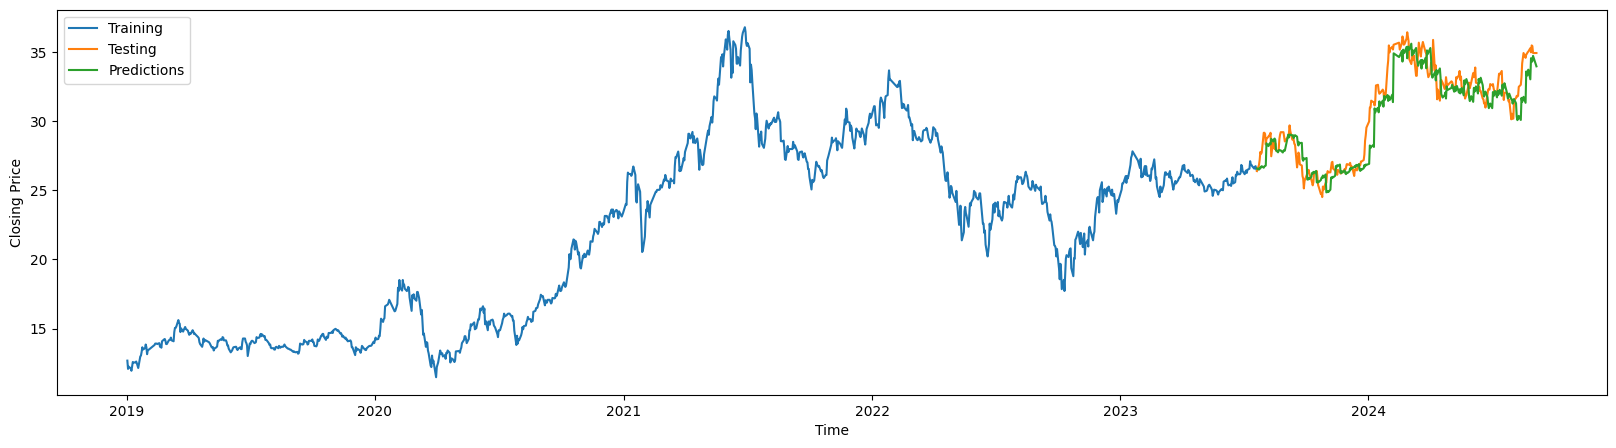

In [59]:

test_start_date = '2023-07-21'
CTG_Test_Y = np.ravel(CTG_Test_Y)  # Flatten if necessary
CTG_prediction = np.ravel(CTG_prediction)  # Flatten if necessary

# Create a DataFrame for testing data
CTG_Test_Data = pd.DataFrame({
    'Date': CTG['Date'][CTG['Date'] >= test_start_date].reset_index(drop=True)[:len(CTG_Test_Y)],
    'Adj. Close': CTG_Test_Y
})

# Add predictions to the DataFrame
CTG_Test_Data['Predictions'] = CTG_prediction

# Plotting
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(CTG['Date'][CTG['Date'] < test_start_date], CTG['Adj. Close'][CTG['Date'] < test_start_date], label='Training')

# Plot Testing Data
plt.plot(CTG_Test_Data['Date'],CTG_Test_Data['Adj. Close'], label='Testing')

# Plot Predictions
plt.plot(CTG_Test_Data['Date'], CTG_Test_Data['Predictions'], label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()


In [60]:
CTG_Test_Y = np.ravel(CTG_Test_Y)
CTG_prediction = np.ravel(CTG_prediction)
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(CTG_Test_Y, CTG_prediction))
print(f'RMSE: {rmse}')

# Calculate MAPE
mape = np.mean(np.abs((CTG_Test_Y - CTG_prediction) / CTG_Test_Y)) * 100
print(f'MAPE: {mape}%')

# Calculate MAE
mae = mean_absolute_error(CTG_Test_Y, CTG_prediction)
print(f'MAE: {mae}')

# Calculate SEM (Standard Error of the Mean)
sem = np.std(CTG_Test_Y - CTG_prediction) / np.sqrt(len(CTG_Test_Y))
print(f'SEM: {sem}')


RMSE: 1.270193826387175
MAPE: 3.1484331380845214%
MAE: 0.9803326932089669
SEM: 0.0707038840161627


# FPT

In [61]:
FPT.head()

,Date,Open,High,Low,Adj. Close,Volume
0,2019-01-02,18.247,18.400,17.964,17.985,459120.0
1,2019-01-03,18.095,18.095,17.767,17.811,716600.0
2,2019-01-04,17.723,18.095,17.680,17.942,318570.0
3,2019-01-07,18.247,18.378,18.160,18.247,408470.0
4,2019-01-08,18.247,18.335,18.204,18.335,295660.0


In [62]:
FPT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1422 non-null   object 
 1   Open        1422 non-null   float64
 2   High        1422 non-null   float64
 3   Low         1422 non-null   float64
 4   Adj. Close  1422 non-null   float64
 5   Volume      1422 non-null   float64
dtypes: float64(5), object(1)
memory usage: 66.8+ KB


In [63]:
# Change Dtype of Date column
FPT["Date"] = pd.to_datetime(FPT["Date"])

### Split the Data into Training and Test set
    

In [64]:
FPT_Date = '2023-07-21'
FPT_Train_X, FPT_Train_Y, FPT_Test_X, FPT_Test_Y = Dataset(FPT, FPT_Date)

### Model Fitting

In [65]:
FPT_Model = Model()

In [66]:
FPT_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [67]:
FPT_hist = FPT_Model.fit(FPT_Train_X, FPT_Train_Y, epochs = 200, validation_data = (FPT_Test_X, FPT_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 1973.4285 - root_mean_squared_error: 44.4178 - val_loss: 10101.3857 - val_root_mean_squared_error: 100.5057 - learning_rate: 0.0000e+00
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1920.2742 - root_mean_squared_error: 43.8078 - val_loss: 10101.2705 - val_root_mean_squared_error: 100.5051 - learning_rate: 6.6667e-08
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1935.0513 - root_mean_squared_error: 43.9586 - val_loss: 10101.0283 - val_root_mean_squared_error: 100.5039 - learning_rate: 1.3333e-07
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1900.2343 - root_mean_squared_error: 43.5560 - val_loss: 10100.6777 - val_root_mean_squared_error: 100.5021 - learning_rate: 2.0000e-07
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2051.2915 - root_mean_squared_error: 45.2516 - val_loss: 10100.1807 - val_root_mean_squared_error: 100.4997 - learning_rate: 2.6667e-07
Epoch 6/200
8/8 ━━━━━━━━━━━━━━

In [68]:
history_dict = FPT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

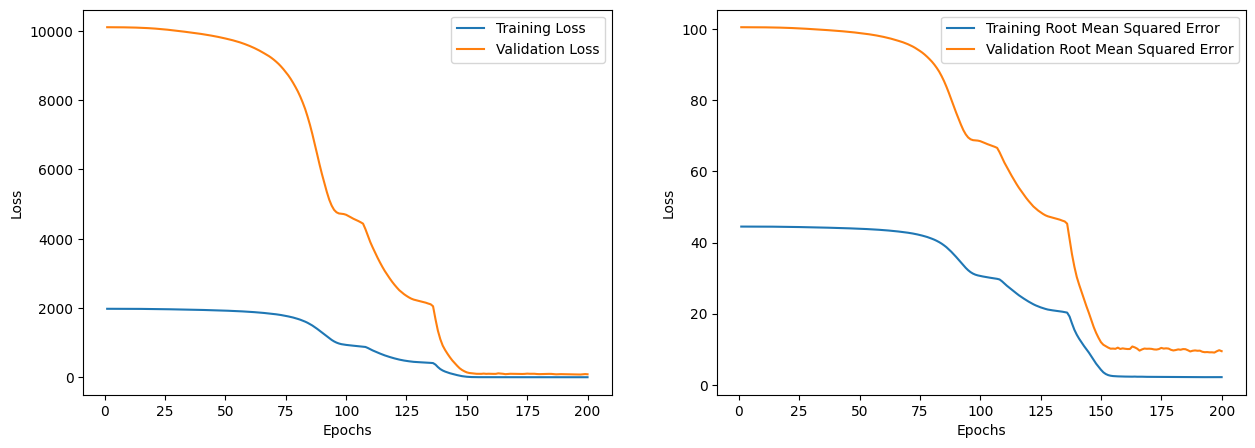

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Amazon

In [70]:
FPT_prediction = FPT_Model.predict(FPT_Test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


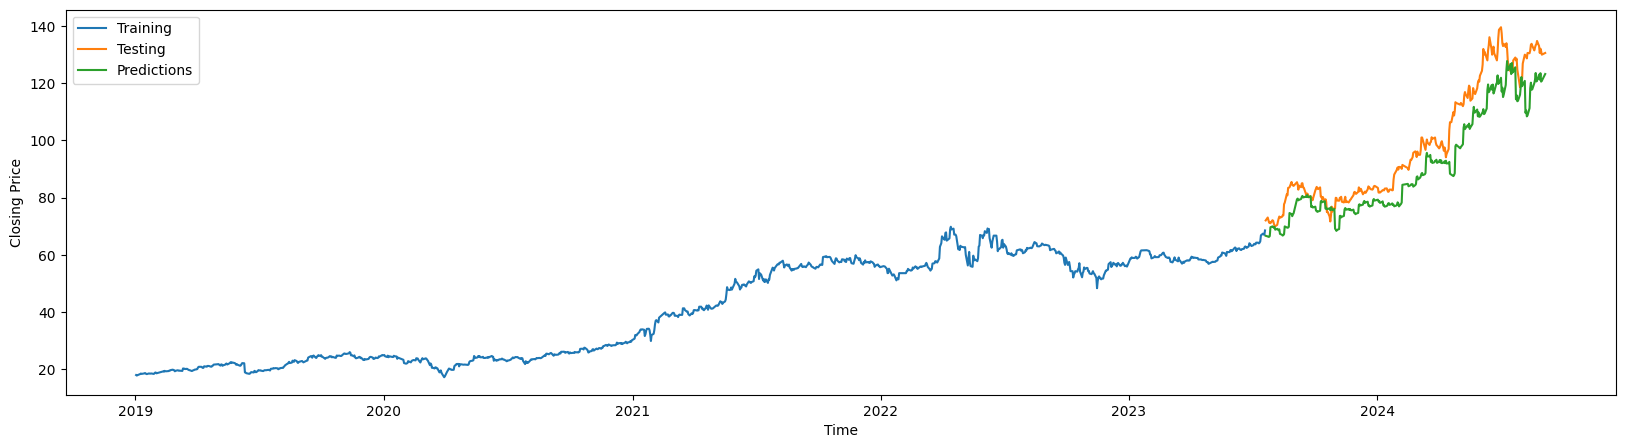

In [71]:

test_start_date = '2023-07-21'
FPT_Test_Y = np.ravel(FPT_Test_Y)  # Flatten if necessary
FPT_prediction = np.ravel(FPT_prediction)  # Flatten if necessary

# Create a DataFrame for testing data
FPT_Test_Data = pd.DataFrame({
    'Date': FPT['Date'][FPT['Date'] >= test_start_date].reset_index(drop=True)[:len(FPT_Test_Y)],
    'Adj. Close': FPT_Test_Y
})

# Add predictions to the DataFrame
FPT_Test_Data['Predictions'] = FPT_prediction

# Plotting
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(FPT['Date'][FPT['Date'] < test_start_date], FPT['Adj. Close'][FPT['Date'] < test_start_date], label='Training')

# Plot Testing Data
plt.plot(FPT_Test_Data['Date'],FPT_Test_Data['Adj. Close'], label='Testing')

# Plot Predictions
plt.plot(FPT_Test_Data['Date'], FPT_Test_Data['Predictions'], label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()


In [72]:
FPT_Test_Y = np.ravel(FPT_Test_Y)
FPT_prediction = np.ravel(FPT_prediction)
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(FPT_Test_Y, FPT_prediction))
print(f'RMSE: {rmse}')

# Calculate MAPE
mape = np.mean(np.abs((FPT_Test_Y - FPT_prediction) / CTG_Test_Y)) * 100
print(f'MAPE: {mape}%')

# Calculate MAE
mae = mean_absolute_error(FPT_Test_Y, FPT_prediction)
print(f'MAE: {mae}')

# Calculate SEM (Standard Error of the Mean)
sem = np.std(FPT_Test_Y - FPT_prediction) / np.sqrt(len(FPT_Test_Y))
print(f'SEM: {sem}')


RMSE: 9.470620774877906
MAPE: 25.228328039498088%
MAE: 7.9402983819144115
SEM: 0.318946259584943


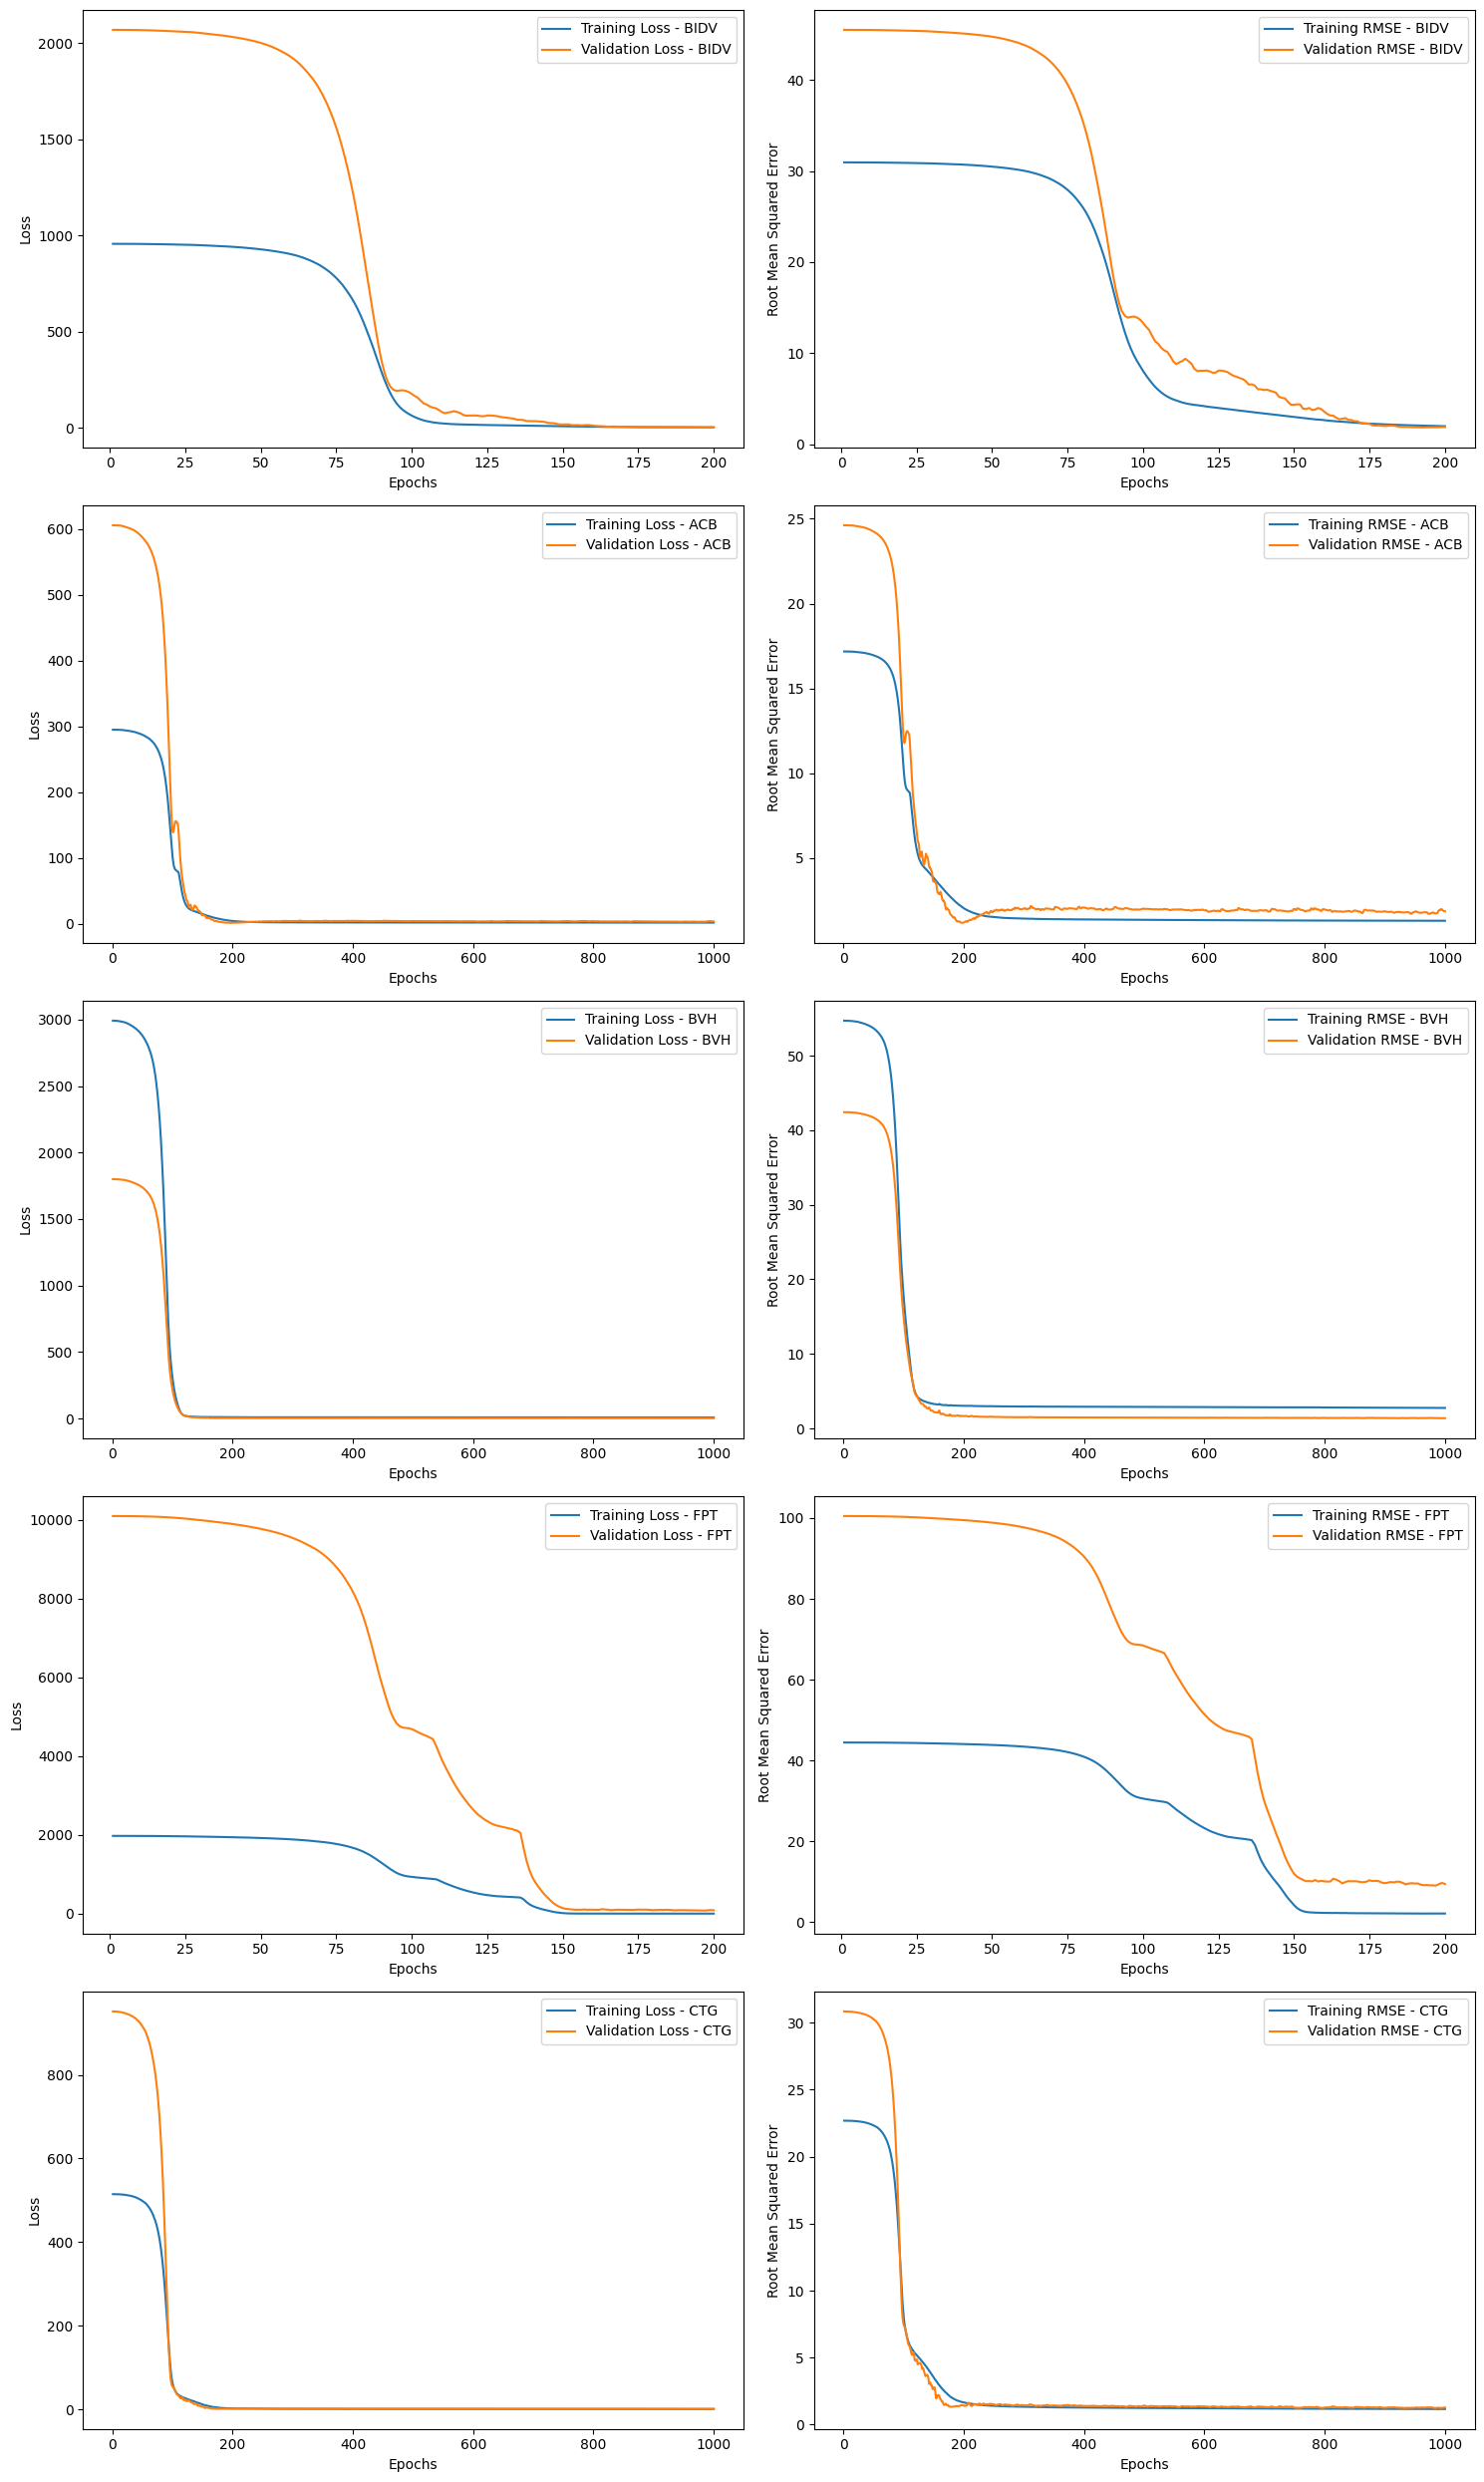

In [85]:
import matplotlib.pyplot as plt

# List of stock symbols (modify this list as per your stocks)
stocks = ['BIDV', 'ACB', 'BVH', 'FPT', 'CTG']

# A dictionary to store the history for each stock
# Assuming you have history stored for each stock, something like this:
# stock_histories = {'BIDV': BIDV_hist.history, 'ACB': ACB_hist.history, ...}
stock_histories = {
    'BIDV': BIDV_hist.history,
    'ACB': ACB_hist.history,
    'BVH': BVH_hist.history,
    'FPT': FPT_hist.history,
    'CTG': CTG_hist.history
}

# Plotting each stock's history
fig, axes = plt.subplots(5,2 , figsize=(15, 25))  # 5 rows, 2 columns

for idx, stock in enumerate(stocks):
    history_dict = stock_histories[stock]
    
    loss = history_dict["loss"]
    root_mean_squared_error = history_dict["root_mean_squared_error"]
    val_loss = history_dict["val_loss"]
    val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

    epochs = range(1, len(loss) + 1)
    
    # Loss subplot
    axes[idx, 0].plot(epochs, loss, label=f'Training Loss - {stock}')
    axes[idx, 0].plot(epochs, val_loss, label=f'Validation Loss - {stock}')
    axes[idx, 0].set_xlabel("Epochs")
    axes[idx, 0].set_ylabel("Loss")
    axes[idx, 0].legend()
    
    # RMSE subplot
    axes[idx, 1].plot(epochs, root_mean_squared_error, label=f'Training RMSE - {stock}')
    axes[idx, 1].plot(epochs, val_root_mean_squared_error, label=f'Validation RMSE - {stock}')
    axes[idx, 1].set_xlabel("Epochs")
    axes[idx, 1].set_ylabel("Root Mean Squared Error")
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()


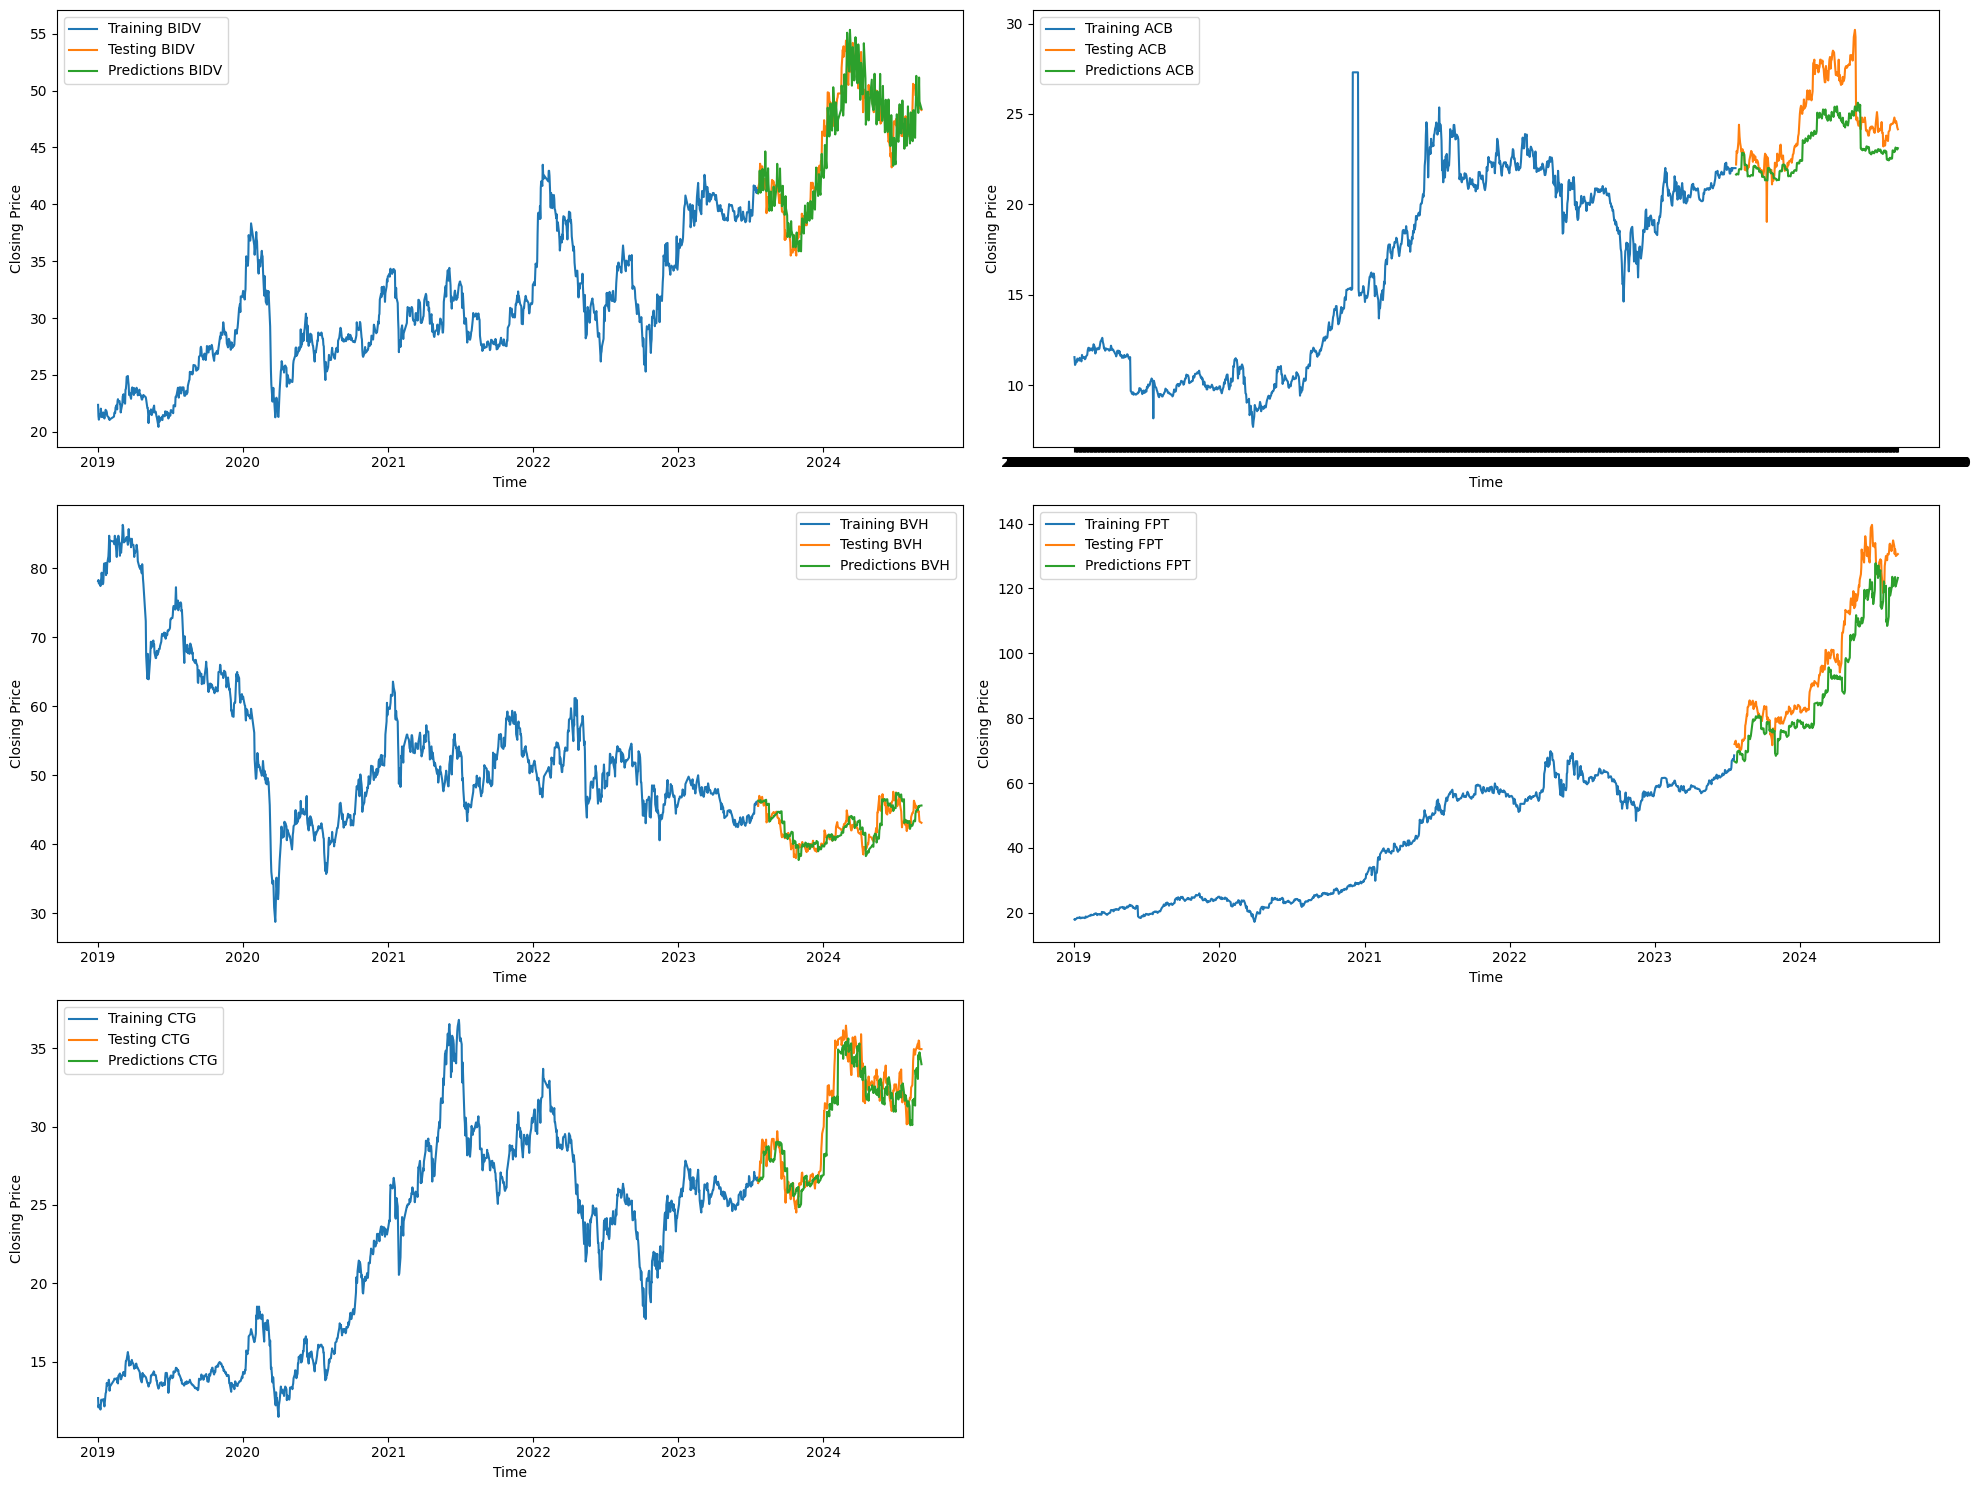

In [86]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have a list of stocks and their corresponding data (similar to FPT)
stocks = ['BIDV', 'ACB', 'BVH', 'FPT', 'CTG']
test_start_date = '2023-07-21'

# Dictionary to store the testing and prediction data for each stock
stock_data = {
    'BIDV': {'Test_Y': np.ravel(BIDV_Test_Y), 'Prediction': np.ravel(BIDV_prediction), 'Data': BIDV},
    'ACB': {'Test_Y': np.ravel(ACB_Test_Y), 'Prediction': np.ravel(ACB_prediction), 'Data': ACB},
    'BVH': {'Test_Y': np.ravel(BVH_Test_Y), 'Prediction': np.ravel(BVH_prediction), 'Data': BVH},
    'FPT': {'Test_Y': np.ravel(FPT_Test_Y), 'Prediction': np.ravel(FPT_prediction), 'Data': FPT},
    'CTG': {'Test_Y': np.ravel(CTG_Test_Y), 'Prediction': np.ravel(CTG_prediction), 'Data': CTG}
}

# Create subplots: 3 rows and 2 columns (last subplot will be empty)
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # 3 rows, 2 columns

for idx, stock in enumerate(stocks):
    row = idx // 2  # Determine the row index
    col = idx % 2   # Determine the column index
    
    stock_test_y = stock_data[stock]['Test_Y']
    stock_prediction = stock_data[stock]['Prediction']
    stock_df = stock_data[stock]['Data']
    
    # Create a DataFrame for testing data
    test_data = pd.DataFrame({
        'Date': stock_df['Date'][stock_df['Date'] >= test_start_date].reset_index(drop=True)[:len(stock_test_y)],
        'Adj. Close': stock_test_y
    })

    # Add predictions to the DataFrame
    test_data['Predictions'] = stock_prediction

    # Plot Training Data
    axes[row, col].plot(stock_df['Date'][stock_df['Date'] < test_start_date], stock_df['Adj. Close'][stock_df['Date'] < test_start_date], label=f'Training {stock}')

    # Plot Testing Data
    axes[row, col].plot(test_data['Date'], test_data['Adj. Close'], label=f'Testing {stock}')

    # Plot Predictions
    axes[row, col].plot(test_data['Date'], test_data['Predictions'], label=f'Predictions {stock}')

    # Set labels and legend
    axes[row, col].set_xlabel('Time')
    axes[row, col].set_ylabel('Closing Price')
    axes[row, col].legend(loc='best')

# Hide the last subplot (bottom right)
axes[2, 1].axis('off')

# Show plot
plt.tight_layout()
plt.show()
